# Insurance Prediction Model

Insurances have become more common in the recent times, with insurances in education, automobiles, houses and even gadgets like phones gaining traction every passing day. This project

## Install and Import Needed Libraries

In [2]:
! pip install pandas_profiling
! pip install dash


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import dash
from pandas_profiling import ProfileReport
import random
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.1.1/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.1.1/u/import-error

In [ ]:
from google.colab import drive
drive.mount('MyDrive')

Drive already mounted at MyDrive; to attempt to forcibly remount, call drive.mount("MyDrive", force_remount=True).


## Load Dataset

In [ ]:
Insurance_Data = pd.read_csv('/content/MyDrive/MyDrive/Insurance_train_data.csv')

In [ ]:
Insurance_Data.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


Renaming the column of customer IDs because of the whitespace between Customer and Id ('Customer Id') which might later bring complications.

In [ ]:
Insurance_Data.rename(columns={'Customer Id': 'Customer_Id'}, inplace=True)

In [ ]:
Insurance_Data.tail()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


## Data Analysis
In this section, we'll get a clear analysis of how the data looks like and what needs to be changed.

In [ ]:
# Using Pandas profiling for analysis
Report = ProfileReport(Insurance_Data)
Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [ ]:
Insurance_Data.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [ ]:
Insurance_Data['Geo_Code']

0       1053
1       1053
2       1053
3       1053
4       1053
        ... 
7155     NaN
7156     NaN
7157     NaN
7158     NaN
7159     NaN
Name: Geo_Code, Length: 7160, dtype: object

In [ ]:
# Removing white spaces in column values.
Insurance_Data['NumberOfWindows'] = Insurance_Data['NumberOfWindows'].str.strip().str.replace(' \.', '.', regex=True)

In [ ]:
# Replacing the dots with nan values
Insurance_Data['NumberOfWindows'].replace(to_replace='.', value=np.nan, inplace=True)

In [ ]:
Insurance_Data['NumberOfWindows'].value_counts()

4       939
3       844
5       639
2       363
6       306
7       211
8       116
1        75
>=10     67
9        49
Name: NumberOfWindows, dtype: int64

In [ ]:
Insurance_Data['NumberOfWindows'].isnull().sum()

3551

In [ ]:
# Replacing null values with forward fill method.
Insurance_Data['NumberOfWindows'].fillna(method='ffill', inplace=True)

In [ ]:
# Replacing null values with forward fill method.
Insurance_Data['Garden'].fillna(method='ffill', inplace=True)

In [ ]:
Insurance_Data['Garden'].isnull().sum()

0

In [ ]:
# Replacing null values with forward fill method.
Insurance_Data['Building_Dimension'].fillna(method='ffill', inplace=True)

In [ ]:
Insurance_Data['Building_Dimension'].isnull().sum()

0

In [ ]:
# Replacing null values with forward fill method.
Insurance_Data['Date_of_Occupancy'].fillna(method='ffill', inplace=True)

In [ ]:
Insurance_Data['Date_of_Occupancy'].isnull().sum()

0

In [ ]:
# Replacing the letters V and N with Yes and No
Insurance_Data['Building_Painted'].replace(to_replace=['V', 'N'], value=['No', 'Yes'], inplace=True)

In [ ]:
Insurance_Data['Building_Painted'].value_counts()

No     5382
Yes    1778
Name: Building_Painted, dtype: int64

In [ ]:
# Replacing the letters V and O with Yes and No
Insurance_Data['Garden'].replace(to_replace=['V', 'O'], value=['Yes', 'No'], inplace=True)

In [ ]:
Insurance_Data['Garden'].value_counts()

No     3606
Yes    3554
Name: Garden, dtype: int64

In [ ]:
# Replacing the letters V and N with Yes and No
Insurance_Data['Building_Fenced'].replace(to_replace=['V', 'N'], value=['No', 'Yes'], inplace=True)

In [ ]:
Insurance_Data['Building_Fenced'].value_counts()

Yes    3608
No     3552
Name: Building_Fenced, dtype: int64

In [ ]:
# Replacing the letters R and U with Rural and Urban
Insurance_Data['Settlement'].replace(to_replace=['R', 'U'], value=['Rural', 'Urban'], inplace=True)

In [ ]:
Insurance_Data['Settlement'].value_counts()

Rural    3610
Urban    3550
Name: Settlement, dtype: int64

In [ ]:
# Replacing null values in Geo Code column using ffill method
Insurance_Data['Geo_Code'].fillna(method='ffill', inplace=True)

In [ ]:
# Replacing null values in Number of Windows column using bfill method
Insurance_Data['NumberOfWindows'].fillna(method='bfill', inplace=True)

In [ ]:
# Convert 'NumberOfWindows' to numeric, coercing any non-numeric values to NaN
Insurance_Data['NumberOfWindows'] = pd.to_numeric(Insurance_Data['NumberOfWindows'], errors='coerce')

# Replace NaN values with 10 in the 'NumberOfWindows' column
Insurance_Data['NumberOfWindows'].fillna(10, inplace=True)


Coerce is used to convert all the rows that have the value '>=10' to NaN.

In [ ]:
Insurance_Data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building_Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [ ]:
# Categorizing the insurance periods into 0, 0.5 and 1 for easier analysis and modelling
# enumerate iterates over the values in the column Insured_Period.
for i, num in enumerate(Insurance_Data['Insured_Period']):
    if num <= 0.5 and num != 0:
        Insurance_Data.loc[i, 'Insured_Period'] = 0.5
    elif num > 0.5:
        Insurance_Data.loc[i, 'Insured_Period'] = 1
    else:
        Insurance_Data.loc[i, 'Insured_Period'] = 0

In [ ]:
Insurance_Data['Insured_Period'].value_counts()

1.0    6516
0.5     479
0.0     165
Name: Insured_Period, dtype: int64

In [ ]:
Insurance_Data['NumberOfWindows'].value_counts()

4.0     1803
3.0     1800
5.0     1216
6.0      693
2.0      691
7.0      404
8.0      202
1.0      133
10.0     121
9.0       97
Name: NumberOfWindows, dtype: int64

In [ ]:
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7160 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building_Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   float64
 11  Geo_Code            7160 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 727.3+ KB


## Data Visualization

### Claim Distribution

In [ ]:
claim_distribution = Insurance_Data['Claim'].value_counts()
fig_pie = px.pie(claim_distribution, values=claim_distribution.values, names=claim_distribution.index,
                 title='Claim Distribution', hole=0.3, labels={'index': 'Claim', 'value': 'Count'})
fig_pie.show()

### Building Types Distribution

In [ ]:
building_type_counts = Insurance_Data['Building_Type'].value_counts()
fig_bar = px.bar(building_type_counts, x=building_type_counts.index, y=building_type_counts.values,
                 title='Building Type Distribution', labels={'index': 'Building Type', 'value': 'Count'})
fig_bar.show()

### Building Dimension by Claim

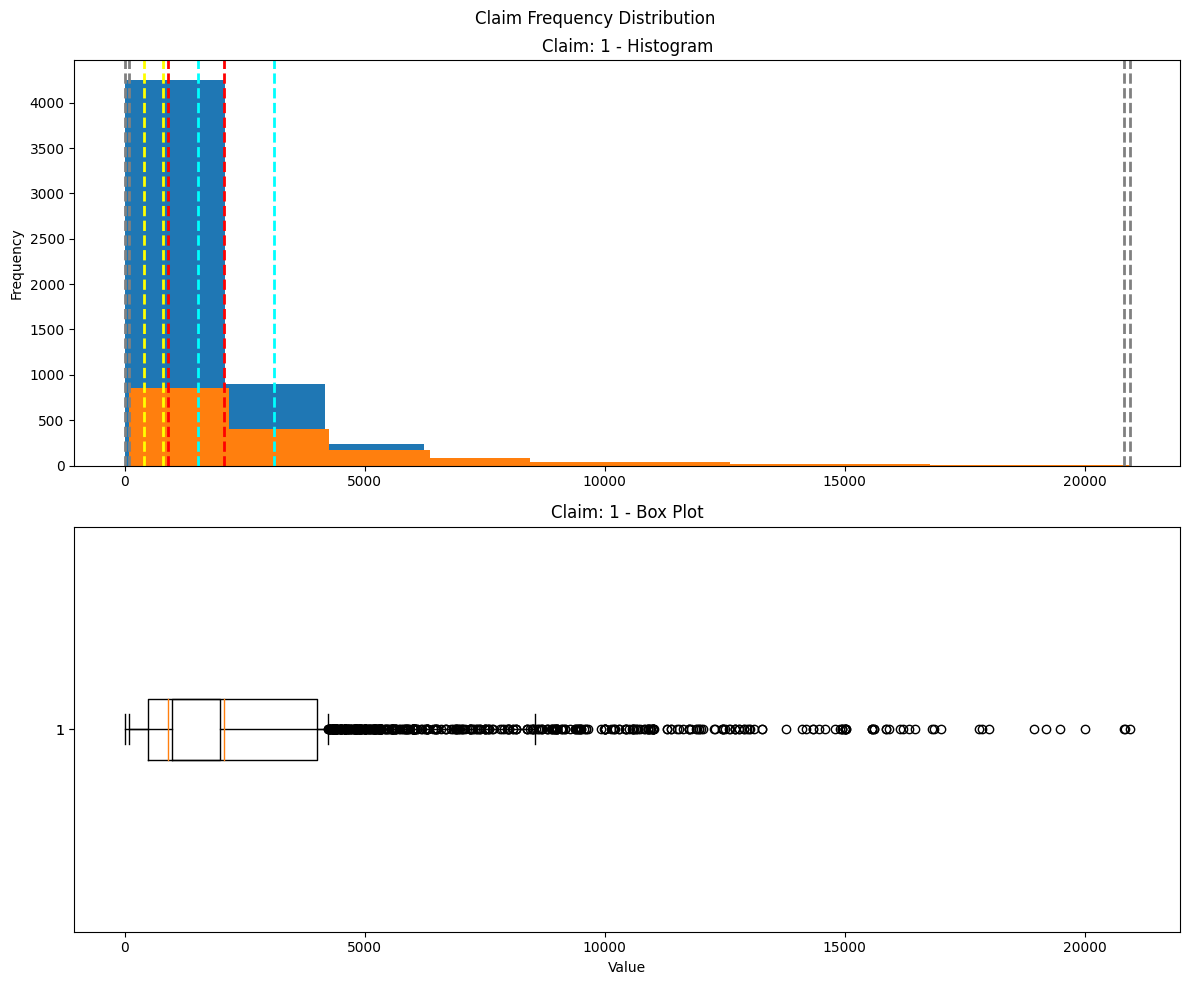

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'Insurance_Data' with the relevant data

# Create a figure for 2x1 subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Loop through each claim category (0 and 1)
for category in [0, 1]:
    # Get the data for the current claim category
    var_data = Insurance_Data[Insurance_Data['Claim'] == category] ['Building_Dimension']

    # Plot histogram
    axes[0].hist(var_data, bins=10)
    axes[0].set_title(f'Claim: {category} - Histogram')
    axes[0].set_ylabel('Frequency')

    # Calculate statistics for the histogram
    min_val = var_data.min()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    max_val = var_data.max()

    # Add lines for the mean, median, and mode
    axes[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2)
    axes[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    axes[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2)
    axes[0].axvline(x=mod_val, color='yellow', linestyle='dashed', linewidth=2)
    axes[0].axvline(x=max_val, color='gray', linestyle='dashed', linewidth=2)

    # Plot the box plot
    axes[1].boxplot(var_data, vert=False)
    axes[1].set_title(f'Claim: {category} - Box Plot')
    axes[1].set_xlabel('Value')

# Add a title to the Figure
fig.suptitle('Claim Frequency Distribution')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()



The histogram reveals a right-skewed claim distribution concerning the building dimensions, indicating that a significant number of instances have relatively lower building dimensions, while relatively fewer instances have larger building dimensions.

In [ ]:
 # Loop through each claim category (0 and 1)
for category in [0, 1]:
    # Get the data for the current claim category
    var_data = Insurance_Data[Insurance_Data['Claim'] == category] ['Building_Dimension']

 # Calculate statistics for the histogram
    min_val = var_data.min()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    max_val = var_data.max()

print('min_val:', min_val, 'mean_val:', mean_val, 'med_val:', med_val, 'mod_val:', mod_val, 'max_val:', max_val, sep='\n')

min_val:
100.0
mean_val:
3121.1254589963282
med_val:
2066.0
mod_val:
800.0
max_val:
20940.0


## Encoding

In [ ]:
# Encoding
geo_code_dummies = pd.get_dummies(Insurance_Data[['Settlement', 'Building_Fenced', 'Building_Painted', 'Garden']], prefix=['Settlement', 'Building_Fenced', 'Building_Painted', 'Garden'])
Insurance_Data = pd.concat([Insurance_Data, geo_code_dummies], axis=1)

# Drop encoded columns and the original categorical columns
Insurance_Data.drop(['Settlement', 'Building_Fenced', 'Building_Painted', 'Garden'], axis=1, inplace=True)

# Frequency encode Geo_Code
geo_code_frequency = Insurance_Data['Geo_Code'].value_counts(normalize=True)
Insurance_Data['Geo_Code_Frequency'] = Insurance_Data['Geo_Code'].map(geo_code_frequency)
Insurance_Data.drop('Geo_Code', axis=1, inplace=True)

## Model Training

In [ ]:
Insurance_Data.shape

(7160, 17)

In [ ]:
Insurance_Data.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim', 'Settlement_Rural', 'Settlement_Urban',
       'Building_Fenced_No', 'Building_Fenced_Yes', 'Building_Painted_No',
       'Building_Painted_Yes', 'Garden_No', 'Garden_Yes',
       'Geo_Code_Frequency'],
      dtype='object')

In [ ]:
Insurance_Data.tail()

,YearOfObservation,Insured_Period,Residential,Building_Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,Settlement_Rural,Settlement_Urban,Building_Fenced_No,Building_Fenced_Yes,Building_Painted_No,Building_Painted_Yes,Garden_No,Garden_Yes,Geo_Code_Frequency
7155,2012,1.0,1,2732.0,1,2001.0,3.0,0,0,1,1,0,1,0,0,1,0.014385
7156,2013,1.0,0,2732.0,2,1980.0,3.0,1,0,1,1,0,1,0,0,1,0.014385
7157,2016,0.5,0,2732.0,1,1992.0,3.0,0,0,1,1,0,1,0,0,1,0.014385
7158,2013,1.0,0,2732.0,1,1972.0,3.0,0,0,1,1,0,1,0,0,1,0.014385
7159,2014,1.0,0,2732.0,1,2004.0,3.0,0,0,1,1,0,1,0,0,1,0.014385


**Splitting the Dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate the features (X) and the target (y)
X = Insurance_Data.drop('Claim', axis=1)
y = Insurance_Data['Claim']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to reduce imbalance.
class_counts = y_train.value_counts()
class_weights = {0: class_counts[1] / class_counts[0], 1: 1}

# Initialize the RandomForestClassifier with class weights
clf = RandomForestClassifier(class_weight=class_weights)

# Train the model on the training data
model = clf.fit(X_train, y_train)



In [ ]:
import joblib

# Save the trained model using joblib
joblib.dump(clf, 'RFC_model.joblib')

['RFC_model.joblib']

Random Forest Classifier was the algorithm of choice because it is able to regulate biasness in the dataset.

### Model Evaluation

In [ ]:
# Predict using the trained model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.77
Confusion Matrix:
[[1022   76]
 [ 257   77]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1098
           1       0.50      0.23      0.32       334

    accuracy                           0.77      1432
   macro avg       0.65      0.58      0.59      1432
weighted avg       0.73      0.77      0.73      1432



## Prediction Testing

In [ ]:
data = {
    'YearOfObservation': ['2019'],
    'Insured_Period': [0.6],
    'Residential': [1],
    'Building_Dimension': [450],
    'Building_Type': [2],
    'Date_of_Occupancy': ['1990'],
    'NumberOfWindows': [5],
    'Settlement_Rural': [1],
    'Settlement_Urban': [0],
    'Building_Fenced_No': [0],
    'Building_Fenced_Yes': [1],
    'Building_Painted_No': [1],
    'Building_Painted_Yes': [0],
    'Garden_No': [1],
    'Garden_Yes': [0],
    'Geo_Code_Frequency': [0.2]
}

sample_df = pd.DataFrame(data)

print(sample_df)

# Make predictions using the trained model
predictions = clf.predict(sample_df)

# Print the predictions
print(predictions)


  YearOfObservation  Insured_Period  Residential  Building_Dimension  \
0              2019             0.6            1                 450   

   Building_Type Date_of_Occupancy  NumberOfWindows  Settlement_Rural  \
0              2              1990                5                 1   

   Settlement_Urban  Building_Fenced_No  Building_Fenced_Yes  \
0                 0                   0                    1   

   Building_Painted_No  Building_Painted_Yes  Garden_No  Garden_Yes  \
0                    1                     0          1           0   

   Geo_Code_Frequency  
0                 0.2  
[0]
